# Датасет

In [ ]:
!cp drive/MyDrive/us_cities.csv ./us_cities.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

feature = 'Region'
size = 1000
train_ratio = 0.8

df = pd.read_csv('us_cities.csv')
df = df.dropna(ignore_index=True)
df[feature] = df[feature].map({'West': -1, 'Midwest': -1, 'Northeast': 1, 'South': 1})
df = df.iloc[:, 1:].drop(columns=['City', 'State', 'County', 'Division', 'Longitude', 'Latitude'])
for column in df:
    if column != 'Region':
        mean = df[column].mean()
        std = df[column].std()
        outliers = np.where((df[column] - mean) / std >= 3)[0]
        df = df.drop(index=outliers).reset_index(drop=True)

west_df = resample(df.loc[df[feature] == -1], n_samples=size).reset_index(drop=True)
east_df = resample(df.loc[df[feature] == 1], n_samples=size).reset_index(drop=True)
df = pd.concat([west_df, east_df])
target = pd.Series(df[feature])
df = df.drop(columns=[feature])
df = (df - df.mean()) / df.std()
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size=train_ratio)

In [ ]:
df

,Population,Asian,White,Black,Indian,Hispanic,Hawaiian,Other,Females,Males,...,Median_female_age,Median_male_age,Households,Persons_per_household,Household_income,Total_area,Land_area,Water_area,Elevation,Density
0,-0.662190,-0.274064,-0.616926,-0.361524,-0.431232,-0.399599,-0.252948,-0.398783,-0.651911,-0.642649,...,0.831985,0.442045,-0.618559,-0.867818,0.073235,-0.425610,-0.424463,-0.205001,0.132004,-0.323817
1,-0.732146,-0.289216,-0.817408,0.005336,-0.397865,-0.416393,-0.252948,-0.410948,-0.747514,-0.768692,...,1.276620,1.029346,-0.745324,-1.012796,-0.840097,-0.389648,-0.384972,-0.234913,-0.718304,-0.945076
2,-0.782729,-0.289216,-0.842956,-0.362903,-0.431232,-0.411595,-0.356807,-0.417031,-0.843117,-0.857409,...,0.885341,1.461184,-0.857382,-0.432884,-0.289246,-0.482883,-0.481403,-0.234913,0.006431,-1.012085
3,-0.688289,-0.258913,-0.540580,-0.349111,1.654190,-0.262844,0.162487,-0.386619,-0.485669,-0.552850,...,0.013857,0.096574,-0.474985,-0.795329,-0.547766,-0.408295,-0.403799,-0.240896,3.005831,-0.030441
4,0.181586,0.460794,0.144425,-0.277394,0.386253,2.810541,0.993357,4.017039,0.245159,0.251016,...,-0.964340,-0.559821,0.109115,1.705544,1.174773,0.317342,0.340510,-0.160132,-0.983801,-0.742526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.713082,0.119880,1.268867,2.754025,3.589461,0.056251,0.370205,-0.204147,1.745587,1.683475,...,0.120569,-0.093435,1.810289,-0.251661,-0.848896,-0.149012,-0.135629,-0.240896,-0.782884,0.039531
996,0.578451,-0.137699,0.697479,-0.292565,-0.364498,-0.298832,-0.252948,-0.380536,0.505410,0.568017,...,0.974268,1.115713,0.614074,-0.070438,1.285253,0.218601,0.244584,-0.240896,0.063836,-0.975778
997,0.791547,0.089577,0.741062,0.763880,0.252786,1.634929,-0.356807,2.155825,0.887820,0.909363,...,-0.181783,-0.628915,0.880211,0.400741,0.074050,-0.282205,-0.302776,0.141987,-0.495860,0.244402
998,0.131002,-0.251337,0.119477,-0.331182,-0.222690,-0.342018,-0.149089,-0.392701,-0.008719,0.031386,...,-0.768701,-1.008934,-0.047065,0.980653,0.083908,-0.490875,-0.489209,-0.240896,-0.538914,0.952725


In [ ]:
target

,Region
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
995,1
996,1
997,1
998,1


# Зависимость для библиотечной реализации

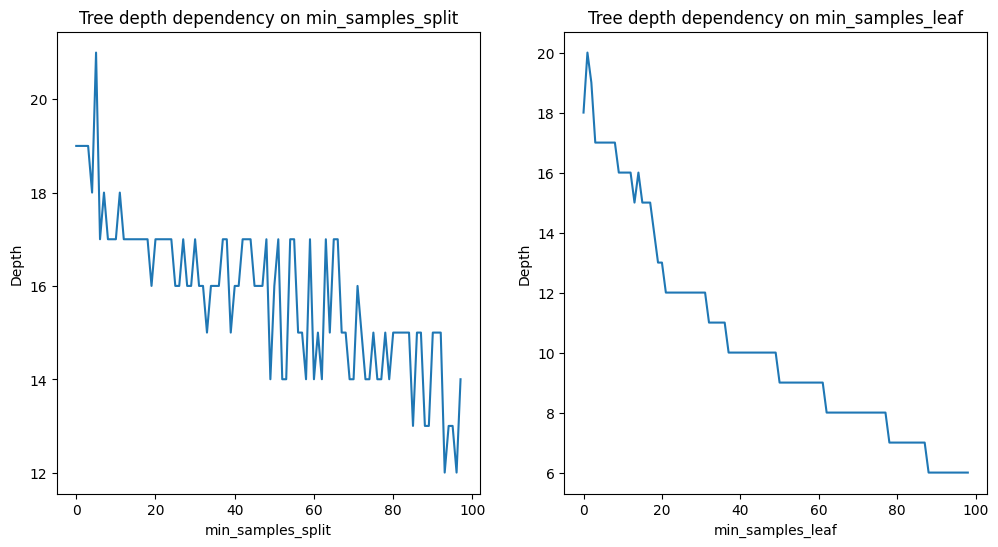

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

depths1 = []
for i in range(2, 100):
    classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=i)
    classifier.fit(X_train, y_train)
    depths1.append(classifier.get_depth())

depths2 = []
for i in range(1, 100):
    classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf=i)
    classifier.fit(X_train, y_train)
    depths2.append(classifier.get_depth())

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Tree depth dependency on min_samples_split')
ax[0].set_xlabel('min_samples_split')
ax[0].set_ylabel('Depth')
ax[0].plot(depths1)
ax[1].set_title('Tree depth dependency on min_samples_leaf')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_ylabel('Depth')
ax[1].plot(depths2)

# Моя реализация

## Gains

In [ ]:
def calculate_gain(criterion, main_positives, main_negatives, left_positives, left_negatives):
    main_samples = main_positives + main_negatives
    left_samples = left_positives + left_negatives
    right_samples = main_samples - left_samples
    return (criterion(main_positives / main_samples, main_negatives / main_samples)
            - left_samples / main_samples * criterion(left_positives / left_samples, left_negatives / left_samples)
            - right_samples / main_samples * criterion((main_positives - left_positives) / right_samples,
                                                       (main_negatives - left_negatives) / right_samples))


def entropy(positive_p, negative_p):
    return -positive_p * (np.log2(positive_p) if positive_p > 0 else 0) - negative_p * (np.log2(negative_p) if negative_p > 0 else 0)


def gini_index(positive_p, negative_p):
    return 1 - positive_p * positive_p - negative_p * negative_p

In [ ]:
def get_gain(criterion):
    match criterion:
        case 'entropy':
            return information_gain
        case 'gini':
            return gini_gain
        case _:
            raise Exception('Unknown gain specified: entropy or gini are available')

def information_gain(main_positives, main_negatives, left_positives, left_negatives):
    return calculate_gain(entropy, main_positives, main_negatives, left_positives, left_negatives)


def gini_gain(main_positives, main_negatives, left_positives, left_negatives):
    return calculate_gain(gini_index, main_positives, main_negatives, left_positives, left_negatives)



## Tree

In [ ]:
class DTreeClassifier:
    gain = None
    max_depth = None
    max_leaf_size = None
    tree = None

    def __init__(self, criterion, max_depth, max_leaf_size):
        self.gain = get_gain(criterion)
        self.max_depth = max_depth
        self.max_leaf_size = max_leaf_size

    def fit(self, X, y, weights=None):
        size = X.shape[0]
        positives = 0
        for i in range(size):
            if y.iloc[i] == 1:
                positives += 1
        w = weights
        if w is None:
          w = np.full(size, 1/size)
        # w = weights if weights is not None else np.full(size, 1 / size)
        self.tree = self.build_tree(X, y, w, positives, size - positives, 1)

    def predict(self, X):
        return np.array([self.tree.get_label(X.iloc[i]) for i in range(X.shape[0])])

    def build_tree(self, samples, target, weights, positives, negatives, depth):
        size = samples.shape[0]
        df = samples.copy()
        target_feature = target.name
        weight_feature = '_Weight'
        if depth == self.max_depth or size <= self.max_leaf_size:
            leaf = DecisionTree()
            label = 0
            for i in range(size):
                try:
                    if type(weights) == pd.Series:
                      label += weights.iloc[i] * target.iloc[i]
                    else:
                      label += weights[i] * target.iloc[i]
                except KeyError:
                    print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
                    print(f'{target_feature=}')
                    print(f'{weights=}')
                    print(f'{target=}')
                    print(f'{type(weights)=}')
                    print(f'{type(target)=}')
                    print(f'{i=}')
                    print(f'{target.iloc[i]=}')
                    print(f'Ooops')
                    print(f'{size=}')
                    print(f'{len(weights)=}')
                    # print(f'{weights[i]=}')
                    print(f'Whooops')
                    raise ArithmeticError("EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")
            leaf.label = 1 if label >= 0 else -1
            return leaf
        max_gain = 0
        split_feature = None
        split_value = 0
        left_positives = 0
        left_negatives = 0
        new_samples = None
        new_target = None
        new_weights = None
        for feature_name in samples:
            df.insert(0, target_feature, target)
            df.insert(0, weight_feature, weights)
            sorted_samples = df.sort_values(feature_name)
            df = df.drop(columns=[target_feature, weight_feature])
            feature = sorted_samples[feature_name]
            sorted_target = sorted_samples[target_feature]
            sorted_weights = sorted_samples[weight_feature]
            sorted_samples = sorted_samples.drop(columns=[target_feature, weight_feature])
            cur_positives = 1 if sorted_target.iloc[0] == 1 else 0
            cur_negatives = 1 - cur_positives
            for i in range(1, size - 1):
                if sorted_target.iloc[i] == 1:
                    cur_positives += 1
                else:
                    cur_negatives += 1
                cur_gain = self.gain(positives, negatives, cur_positives, cur_negatives)
                if cur_gain >= max_gain:
                    max_gain = cur_gain
                    split_feature = feature_name
                    split_value = feature.iloc[i]
                    left_positives = cur_positives
                    left_negatives = cur_negatives
                    new_samples = sorted_samples
                    new_target = sorted_target
                    new_weights = sorted_weights
        tree = DecisionTree()
        tree.split_rule = lambda v: True if v[split_feature] <= split_value else False
        left_samples = left_positives + left_negatives
        tree.left = self.build_tree(
            new_samples.iloc[:left_samples],
            new_target.iloc[:left_samples],
            new_weights.iloc[:left_samples],
            left_positives,
            left_negatives,
            depth + 1
        )
        tree.right = self.build_tree(
            new_samples.iloc[left_samples:],
            new_target.iloc[left_samples:],
            new_weights.iloc[left_samples:],
            positives - left_positives,
            negatives - left_negatives,
            depth + 1
        )
        return tree


class DecisionTree:
    split_rule = None
    left = None
    right = None
    label = None

    def get_label(self, v):
        if self.split_rule is None:
            return self.label
        if self.split_rule(v):
            return self.left.get_label(v)
        else:
            return self.right.get_label(v)

In [ ]:
class RForestClassifier:
    n_estimators = None
    criterion = None
    max_depth = None
    max_leaf_size = None
    forest = None

    def __init__(self, n_estimators, criterion, max_depth, max_leaf_size):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.max_leaf_size = max_leaf_size

    def fit(self, X, y):
        self.forest = []
        df = X.copy()
        target_feature = y.name
        n_samples = df.shape[0] // self.n_estimators
        n_features = int(np.sqrt(df.shape[1]))
        for i in range(self.n_estimators):
            tree = DTreeClassifier(self.criterion, self.max_depth, self.max_leaf_size)
            df.insert(0, target_feature, y)
            sample = df.sample(n=n_samples, replace=True, axis=0)
            target = sample[target_feature]
            sample = sample.drop(columns=[target_feature]).sample(n=n_features, axis=1)
            df = df.drop(columns=[target_feature])
            tree.fit(sample, target)
            self.forest.append(tree)

    def predict(self, X):
        result = np.zeros(X.shape[0])
        for tree in self.forest:
            result += tree.predict(X)
        for i in range(X.shape[0]):
            result[i] = 1 if result[i] >= 0 else -1
        return result

In [ ]:
class BoostingClassifier:
    n_estimators = None
    criterion = None
    max_depth = None
    max_leaf_size = None
    estimators = None
    estimators_weights = None

    def __init__(self, n_estimators, criterion, max_depth, max_leaf_size):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.max_leaf_size = max_leaf_size

    def fit(self, X, y):
        self.estimators = []
        self.estimators_weights = []
        weights = np.full(X.shape[0], 1 / X.shape[0])
        for i in range(self.n_estimators):
            tree = DTreeClassifier(self.criterion, self.max_depth, self.max_leaf_size)
            tree.fit(X, y, weights)
            prediction = tree.predict(X)
            errors = (prediction != y)
            rate = np.average(errors, weights=weights)
            tree_weight = 0.5 * np.log((1 - rate) / (rate + 1e-9))
            weights *= tree_weight * errors
            weights /= np.sum(weights)
            self.estimators.append(tree)
            self.estimators_weights.append(tree_weight)

    def predict(self, X):
        result = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            result += self.estimators_weights[i] * self.estimators[i].predict(X)
        for i in range(X.shape[0]):
            result[i] = 1 if result[i] >= 0 else -1
        return result.astype(int)

# Подбор гиперпараметров для дерева решений

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.metrics import f1_score

train_size = int(X_train.shape[0] * train_ratio)
train_data = X_train.iloc[: train_size]
valid_data = X_train.iloc[train_size:]
train_target = y_train.iloc[: train_size]
valid_target = y_train.iloc[train_size :]

In [ ]:
type(train_target)

pandas.core.series.Series

## Моя реализация

In [ ]:
def my_objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    max_depth = trial.suggest_int('max_depth', 2, 100)
    max_leaf_size = trial.suggest_int('max_leaf_size', 2, 100)
    classifier = DTreeClassifier(criterion, max_depth, max_leaf_size)
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(my_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 08:21:25,841] A new study created in memory with name: no-name-51c49663-dca9-4494-9392-cf4efb0f80fc
[I 2024-10-17 08:22:01,134] Trial 0 finished with value: 0.7670454545454546 and parameters: {'criterion': 'gini', 'max_depth': 56, 'max_leaf_size': 4}. Best is trial 0 with value: 0.7670454545454546.
[I 2024-10-17 08:22:22,127] Trial 1 finished with value: 0.7601078167115903 and parameters: {'criterion': 'gini', 'max_depth': 79, 'max_leaf_size': 41}. Best is trial 0 with value: 0.7670454545454546.
[I 2024-10-17 08:22:35,831] Trial 2 finished with value: 0.8048048048048048 and parameters: {'criterion': 'entropy', 'max_depth': 63, 'max_leaf_size': 67}. Best is trial 2 with value: 0.8048048048048048.
[I 2024-10-17 08:22:51,900] Trial 3 finished with value: 0.7950310559006211 and parameters: {'criterion': 'entropy', 'max_depth': 57, 'max_leaf_size': 43}. Best is trial 2 with value: 0.8048048048048048.
[I 2024-10-17 08:23:07,124] Trial 4 finished with value: 0.7835616438356164 a

{'criterion': 'entropy', 'max_depth': 97, 'max_leaf_size': 82}


## Библиотечная

In [ ]:
def sklearn_objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini', 'log_loss'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 2, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    classifier = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(sklearn_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 08:43:03,702] A new study created in memory with name: no-name-26c900de-472d-4395-bcd8-c8a24ee7a18f
[I 2024-10-17 08:43:03,727] Trial 0 finished with value: 0.7580174927113703 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 89, 'min_samples_split': 11}. Best is trial 0 with value: 0.7580174927113703.
[I 2024-10-17 08:43:03,772] Trial 1 finished with value: 0.7643312101910829 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 81, 'min_samples_split': 78}. Best is trial 1 with value: 0.7643312101910829.
[I 2024-10-17 08:43:03,814] Trial 2 finished with value: 0.7424749163879598 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 96, 'min_samples_split': 88}. Best is trial 1 with value: 0.7643312101910829.
[I 2024-10-17 08:43:03,833] Trial 3 finished with value: 0.7323076923076923 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 53, 'min_samples_split': 10}. Best is trial 1 

{'criterion': 'gini', 'splitter': 'best', 'max_depth': 55, 'min_samples_split': 8}


My DecisionTree
```
{'criterion': 'entropy', 'max_depth': 97, 'max_leaf_size': 82}
```
sklearn
```
{'criterion': 'gini', 'splitter': 'best', 'max_depth': 55, 'min_samples_split': 8}
```

## Зависимость качества от высоты дерева

In [ ]:
from sklearn.metrics import f1_score

my_train_scores = []
my_test_scores = []
for i in range(1, 100):
    classifier = DTreeClassifier(criterion='entropy', max_depth=i, max_leaf_size=82)
    classifier.fit(X_train, y_train)
    my_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    my_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

sklearn_train_scores = []
sklearn_test_scores = []
for i in range(1, 100):
    classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i, min_samples_split=8)
    classifier.fit(X_train, y_train)
    sklearn_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    sklearn_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

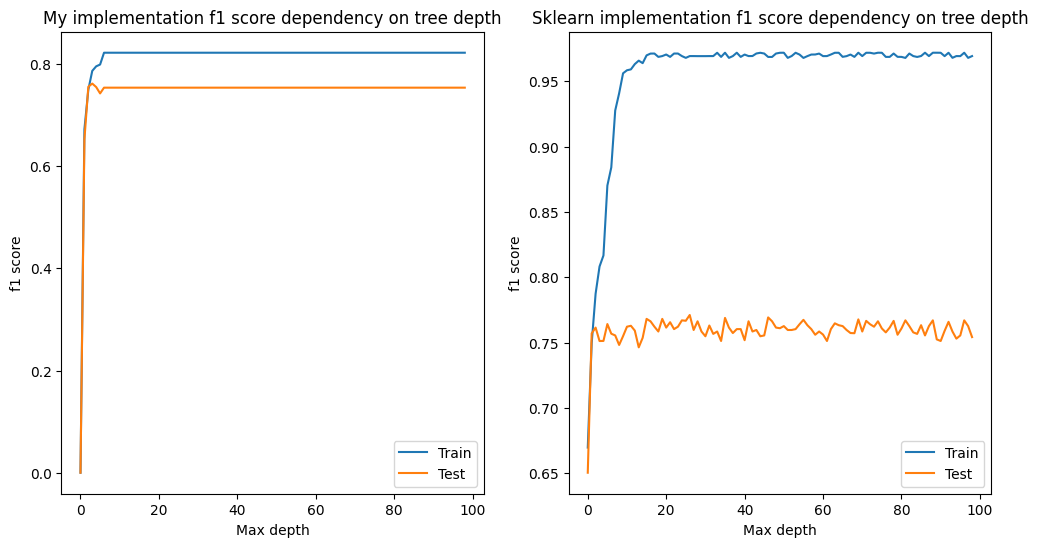

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('My implementation f1 score dependency on tree depth')
ax[0].set_xlabel('Max depth')
ax[0].set_ylabel('f1 score')
ax[0].plot(my_train_scores, label='Train')
ax[0].plot(my_test_scores, label='Test')
ax[0].legend()
ax[1].set_title('Sklearn implementation f1 score dependency on tree depth')
ax[1].set_xlabel('Max depth')
ax[1].set_ylabel('f1 score')
ax[1].plot(sklearn_train_scores, label='Train')
ax[1].plot(sklearn_test_scores, label='Test')
ax[1].legend()

# Случайный лес

## Моя реализация

In [ ]:
def my_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    max_depth = trial.suggest_int('max_depth', 1, 50)
    max_leaf_size = trial.suggest_int('max_leaf_size', 2, 50)
    classifier = RForestClassifier(n_estimators, criterion, max_depth, max_leaf_size)
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(my_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 09:08:10,848] A new study created in memory with name: no-name-9e65f6d2-577d-441b-a235-0c621ae9bcab
[I 2024-10-17 09:08:12,028] Trial 0 finished with value: 0.7507163323782235 and parameters: {'n_estimators': 31, 'criterion': 'gini', 'max_depth': 27, 'max_leaf_size': 39}. Best is trial 0 with value: 0.7507163323782235.
[I 2024-10-17 09:08:13,893] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 14, 'max_leaf_size': 36}. Best is trial 0 with value: 0.7507163323782235.
[I 2024-10-17 09:08:15,313] Trial 2 finished with value: 0.7138643067846607 and parameters: {'n_estimators': 13, 'criterion': 'gini', 'max_depth': 32, 'max_leaf_size': 20}. Best is trial 0 with value: 0.7507163323782235.
[I 2024-10-17 09:08:17,685] Trial 3 finished with value: 0.7298850574712644 and parameters: {'n_estimators': 23, 'criterion': 'gini', 'max_depth': 16, 'max_leaf_size': 11}. Best is trial 0 with value: 0.7507163323782235.
[I 2024-10-17 

{'n_estimators': 28, 'criterion': 'gini', 'max_depth': 32, 'max_leaf_size': 3}


## sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def sklearn_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 100)
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 1, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(sklearn_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 09:13:21,832] A new study created in memory with name: no-name-635682e0-5feb-40fa-ad5e-0865a9876513
[I 2024-10-17 09:13:21,931] Trial 0 finished with value: 0.8414634146341463 and parameters: {'n_estimators': 19, 'criterion': 'gini', 'max_depth': 70, 'min_samples_split': 65}. Best is trial 0 with value: 0.8414634146341463.
[I 2024-10-17 09:13:21,970] Trial 1 finished with value: 0.8132530120481928 and parameters: {'n_estimators': 6, 'criterion': 'gini', 'max_depth': 46, 'min_samples_split': 15}. Best is trial 0 with value: 0.8414634146341463.
[I 2024-10-17 09:13:22,216] Trial 2 finished with value: 0.8209876543209876 and parameters: {'n_estimators': 61, 'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 50}. Best is trial 0 with value: 0.8414634146341463.
[I 2024-10-17 09:13:22,584] Trial 3 finished with value: 0.8073394495412844 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 79}. Best is trial 0 with value: 0

{'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 21}


My
```
{'n_estimators': 28, 'criterion': 'gini', 'max_depth': 32, 'max_leaf_size': 3}
```
sklearn
```
{'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 21}
```

## Зависимость качества от числа деревьев

In [ ]:
from sklearn.metrics import f1_score

my_train_scores = []
my_test_scores = []
for i in range(1, 100):
    classifier = RForestClassifier(n_estimators=i, criterion='gini', max_depth=32, max_leaf_size=3)
    classifier.fit(X_train, y_train)
    my_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    my_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

In [ ]:
sklearn_train_scores = []
sklearn_test_scores = []
for i in range(1, 100):
    classifier = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=23, min_samples_split=21)
    classifier.fit(X_train, y_train)
    sklearn_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    sklearn_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

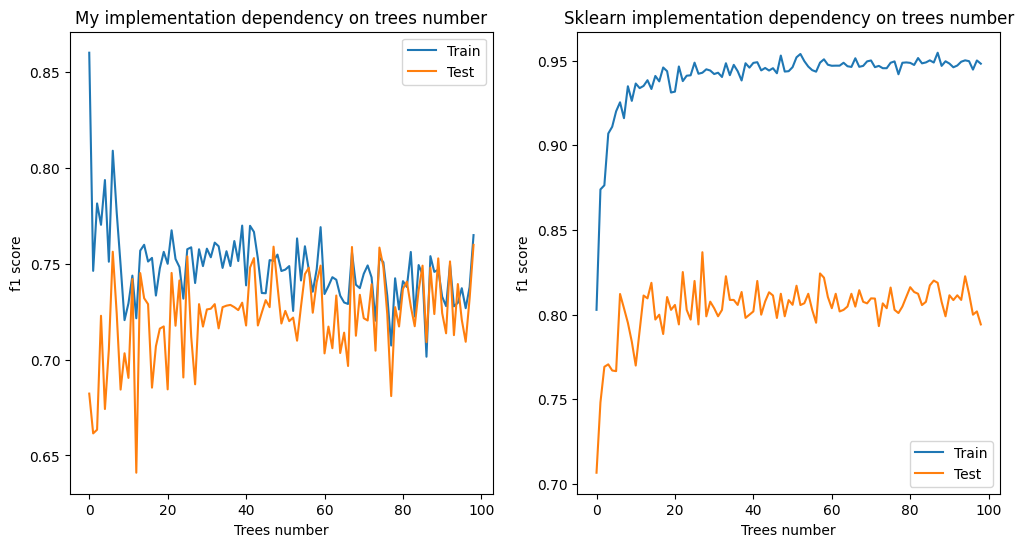

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('My implementation dependency on trees number')
ax[0].set_xlabel('Trees number')
ax[0].set_ylabel('f1 score')
ax[0].plot(my_train_scores, label='Train')
ax[0].plot(my_test_scores, label='Test')
ax[0].legend()
ax[1].set_title('Sklearn implementation dependency on trees number')
ax[1].set_xlabel('Trees number')
ax[1].set_ylabel('f1 score')
ax[1].plot(sklearn_train_scores, label='Train')
ax[1].plot(sklearn_test_scores, label='Test')
ax[1].legend()

# Бустинг

In [ ]:
def my_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 100)
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    max_depth = trial.suggest_int('max_depth', 1, 5)
    max_leaf_size = trial.suggest_int('max_leaf_size', 50, 100)
    classifier = BoostingClassifier(n_estimators, criterion, max_depth, max_leaf_size)
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(my_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 09:39:56,319] A new study created in memory with name: no-name-d72eba4e-2ce3-47b8-b957-191685e10081
[I 2024-10-17 09:41:01,369] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 3, 'max_leaf_size': 89}. Best is trial 0 with value: 0.0.
[I 2024-10-17 09:43:35,265] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_size': 63}. Best is trial 0 with value: 0.0.
[I 2024-10-17 09:43:38,220] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 35, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_size': 94}. Best is trial 0 with value: 0.0.
[I 2024-10-17 09:44:28,207] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 28, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_size': 56}. Best is trial 0 with value: 0.0.
[I 2024-10-17 09:44:46,272] Trial 4 finished with value: 0.0 and parameters: {'n_estimators': 48, 'criterion': 'gini', '

{'n_estimators': 2, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_size': 70}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def sklearn_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 100)
    loss = trial.suggest_categorical('loss', ['log_loss', 'exponential'])
    criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error'])
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    classifier = GradientBoostingClassifier(
        n_estimators=n_estimators,
        loss=loss,
        criterion=criterion,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    classifier.fit(train_data, train_target)
    return f1_score(valid_target, classifier.predict(valid_data))

study = optuna.create_study(direction='maximize')
study.optimize(sklearn_objective, n_trials=100)
print(study.best_params)

[I 2024-10-17 10:30:50,841] A new study created in memory with name: no-name-140eab35-82ed-431a-8302-64bfe5b5221c
[I 2024-10-17 10:30:51,258] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 8, 'loss': 'exponential', 'criterion': 'squared_error', 'learning_rate': 0.002938249104997077, 'max_depth': 77, 'min_samples_split': 9}. Best is trial 0 with value: 0.0.
[I 2024-10-17 10:30:51,486] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 24, 'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.00019994041509482186, 'max_depth': 3, 'min_samples_split': 79}. Best is trial 0 with value: 0.0.
[I 2024-10-17 10:30:54,377] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 89, 'loss': 'log_loss', 'criterion': 'friedman_mse', 'learning_rate': 0.00011918770958498819, 'max_depth': 61, 'min_samples_split': 49}. Best is trial 0 with value: 0.0.
[I 2024-10-17 10:30:56,680] Trial 3 finished with value: 0.7737704918032787 and parameters: {'

{'n_estimators': 98, 'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.07928878276333952, 'max_depth': 100, 'min_samples_split': 40}


My:
```
{'n_estimators': 2, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_size': 70}
```
sklearn:
```
{'n_estimators': 98, 'loss': 'log_loss', 'criterion': 'squared_error', 'learning_rate': 0.07928878276333952, 'max_depth': 100, 'min_samples_split': 40}
```

## Зависимость от числа деревьев

In [ ]:
my_train_scores = []
my_test_scores = []
for i in range(1, 50):
    classifier = BoostingClassifier(n_estimators=i, criterion='gini', max_depth=5, max_leaf_size=70)
    classifier.fit(X_train, y_train)
    my_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    my_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

In [ ]:
sklearn_train_scores = []
sklearn_test_scores = []
for i in range(1, 50):
    classifier = GradientBoostingClassifier(
        n_estimators=i,
        loss='log_loss',
        criterion='squared_error',
        learning_rate=0.079,
        max_depth=100,
        min_samples_split=40
    )
    classifier.fit(X_train, y_train)
    sklearn_train_scores.append(f1_score(y_train, classifier.predict(X_train)))
    sklearn_test_scores.append(f1_score(y_test, classifier.predict(X_test)))

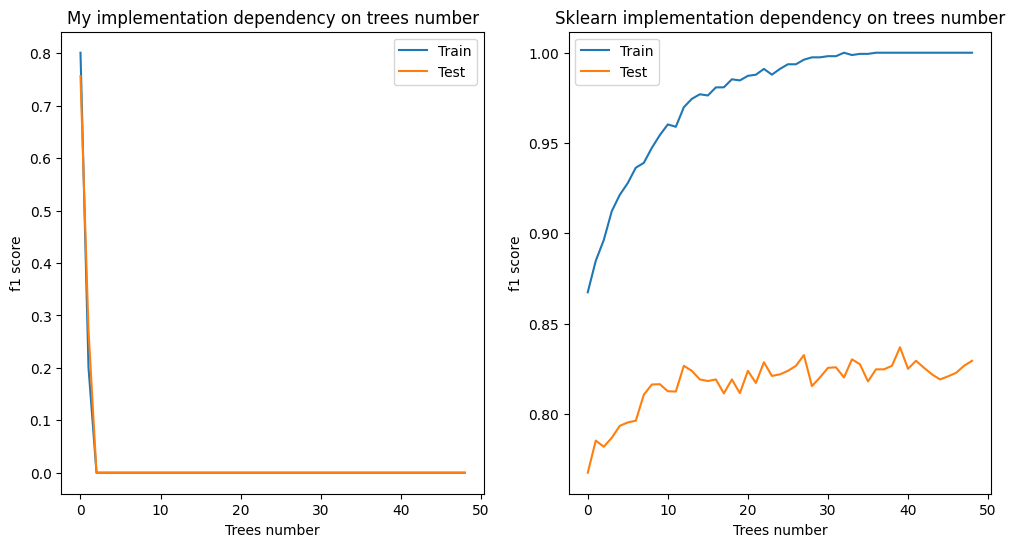

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('My implementation dependency on trees number')
ax[0].set_xlabel('Trees number')
ax[0].set_ylabel('f1 score')
ax[0].plot(my_train_scores, label='Train')
ax[0].plot(my_test_scores, label='Test')
ax[0].legend()
ax[1].set_title('Sklearn implementation dependency on trees number')
ax[1].set_xlabel('Trees number')
ax[1].set_ylabel('f1 score')
ax[1].plot(sklearn_train_scores, label='Train')
ax[1].plot(sklearn_test_scores, label='Test')
ax[1].legend()